<a href="https://colab.research.google.com/github/Caioffonseca/TCC-PUC_Minas/blob/main/Cen%C3%A1rio_Futuro_Energia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e tratamento dos Dados

In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

Importação dos Datasets e Tratamento dos Dados

In [3]:
url = 'https://raw.githubusercontent.com/Caioffonseca/TCC-PUC_Minas/main/WEO2021_Free_Data_Regions.csv'
df_weo = pd.read_csv(url)

url = 'https://raw.githubusercontent.com/Caioffonseca/TCC-PUC_Minas/main/energy_transition_tweets_final.csv'
df_tweets = pd.read_csv(url)

In [4]:
df_weo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Publication  2754 non-null   object 
 1   Scenario     2754 non-null   object 
 2   Region       2754 non-null   object 
 3   Category     2754 non-null   object 
 4   Product      2754 non-null   object 
 5   Flow         2754 non-null   object 
 6   Unit         2754 non-null   object 
 7   Year         2754 non-null   int64  
 8   Value        2754 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 193.8+ KB


In [5]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16726 entries, 0 to 16725
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweetURL        16726 non-null  object 
 1   tweetID         16726 non-null  int64  
 2   date            16726 non-null  object 
 3   tweetContent    16726 non-null  object 
 4   userLocation    13295 non-null  object 
 5   isUserVerified  16726 non-null  bool   
 6   replyCount      16726 non-null  int64  
 7   retweetCount    16726 non-null  int64  
 8   likeCount       16726 non-null  int64  
 9   quoteCount      16726 non-null  int64  
 10  tweetLanguage   16726 non-null  object 
 11  sourceLabel     16726 non-null  object 
 12  coordinates     0 non-null      float64
 13  place           0 non-null      float64
dtypes: bool(1), float64(2), int64(5), object(6)
memory usage: 1.7+ MB


In [6]:
#Remove todos Tweets que não foram escritos em inglês, para padronização das Tags
df_tweets = df_tweets[df_tweets['tweetLanguage'] == 'en']

In [7]:
#Verficação se de há algum Tweet que porventura possa não ter sido deletado.
df_tweets[df_tweets['tweetLanguage'] != 'en']

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place


In [8]:
#Verifica se há entradas duplicadas no dataset
df_tweets.duplicated().value_counts()

False    16014
dtype: int64

In [9]:
df_tweets['Data'] = df_tweets['date'].astype('datetime64[D]')
df_tweets['Dia_da_Semana'] = df_tweets['Data'].dt.day_name()
df_tweets['DataText'] = df_tweets['date'].str[0:10]
df_tweets['Tweet_Size'] = df_tweets['tweetContent'].apply(lambda x: len(x))

df_tweets.drop(columns=['tweetID', 'date', 'userLocation', 'isUserVerified', 'tweetLanguage','sourceLabel', 'coordinates', 'place'], inplace=True)

df_tweets.head(5)

,tweetURL,tweetContent,replyCount,retweetCount,likeCount,quoteCount,Data,Dia_da_Semana,DataText,Tweet_Size
0,https://twitter.com/thomascheneygpc/status/146...,@sjmuir Why I like local Renewable Natural Gas...,0,0,0,0,2021-11-17,Wednesday,2021-11-17,100
1,https://twitter.com/alexizawadzki/status/14611...,Nevada is critical towards the clean energy tr...,0,1,21,0,2021-11-17,Wednesday,2021-11-17,79
2,https://twitter.com/getiftech/status/146111665...,COP26 Net Zero Commitments will Speed Energy T...,0,0,0,0,2021-11-17,Wednesday,2021-11-17,171
3,https://twitter.com/KirkMMorrison/status/14611...,@alanfryermedia You’re onto something! 🇨🇦 has ...,0,1,5,0,2021-11-17,Wednesday,2021-11-17,288
4,https://twitter.com/ColumbiaUEnergy/status/146...,"""The reality is that actions in this decade wi...",0,1,3,1,2021-11-17,Wednesday,2021-11-17,267


In [10]:
df_tweets = df_tweets.sort_values(by='DataText', ascending = True)

In [11]:
#Tratamento dos Dados Dataset World Energy Outlook (WEO)
#Selecionar somente os dados relacionados aos quantitativos de geração de energia
df_weo = df_weo[df_weo['Category'] == 'Energy']

In [12]:
#Seleção dos elementos somente de geração
df_weo = df_weo[df_weo['Flow'] == 'Electricity generation']

In [13]:
#Como o Data_set é um disponibilizado de formas Agrupadas, é necessário remover os itens individuais de paises para considerar suas regiões
df_weo = df_weo[df_weo['Region'] != 'World']
df_weo = df_weo[df_weo['Region'] != 'United States']
df_weo = df_weo[df_weo['Region'] != 'European Union']
df_weo = df_weo[df_weo['Region'] != 'Russia']
df_weo = df_weo[df_weo['Region'] != 'China']
df_weo = df_weo[df_weo['Region'] != 'India']
df_weo = df_weo[df_weo['Region'] != 'Japan']
df_weo = df_weo[df_weo['Region'] != 'Southeast Asia']

df_weo = df_weo[df_weo['Product'] != 'Total']

In [14]:
df_weo['Region'].unique()

array(['North America', 'Central and South America', 'Brazil', 'Europe',
       'Africa', 'Middle East', 'Eurasia', 'Asia Pacific'], dtype=object)

In [15]:
df_weo.drop(columns=['Publication', 'Category', 'Flow', 'Unit'], inplace=True)

In [16]:
df_weo.rename(columns={'Value': 'Value(TWh)'}, inplace=True)

In [17]:
df_weo.head(5)

,Scenario,Region,Product,Year,Value(TWh)
887,Stated Policies Scenario,North America,Renewables,2010,866.85
888,Stated Policies Scenario,North America,Renewables,2019,1257.76
889,Stated Policies Scenario,North America,Renewables,2020,1340.01
890,Stated Policies Scenario,North America,Renewables,2030,2270.31
891,Stated Policies Scenario,North America,Renewables,2050,4045.36


In [18]:
#Criando Datasets distintos para cada um cenários
df_aps = df_weo[df_weo['Scenario'] == 'Announced Pledges Scenario']
df_steps = df_weo[df_weo['Scenario'] == 'Stated Policies Scenario']
df_sds = df_weo[df_weo['Scenario'] == 'Sustainable Development Scenario']

In [19]:
#Criando Datasets distintos análise do Brasil
df_apsBr = df_aps[df_aps['Region'] == 'Brazil']
df_stepsBr = df_steps[df_steps['Region'] == 'Brazil']
df_sdsBr = df_sds[df_sds['Region'] == 'Brazil']

In [20]:
#Ajustando Datasets removendo o Brasil
df_aps = df_aps[df_aps['Region'] != 'Brazil']
df_steps = df_steps[df_steps['Region'] != 'Brazil']
df_sds = df_sds[df_sds['Region'] != 'Brazil']

In [21]:
#Tornando os dados ordenados para melhor apresentação nos gráficos
df_apsBrGr = df_apsBr.groupby(['Year', 'Product'])['Value(TWh)'].sum().reset_index(name='TWh')
df_stepsBrGr = df_stepsBr.groupby(['Year', 'Product'])['Value(TWh)'].sum().reset_index(name='TWh')
df_sdsBrGr = df_sdsBr.groupby(['Year', 'Product'])['Value(TWh)'].sum().reset_index(name='TWh')

df_apsGr = df_aps.groupby(['Year', 'Product'])['Value(TWh)'].sum().reset_index(name='TWh')
df_stepsGr = df_steps.groupby(['Year', 'Product'])['Value(TWh)'].sum().reset_index(name='TWh')
df_sdsGr = df_sds.groupby(['Year', 'Product'])['Value(TWh)'].sum().reset_index(name='TWh')

# Análise dos Dados

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

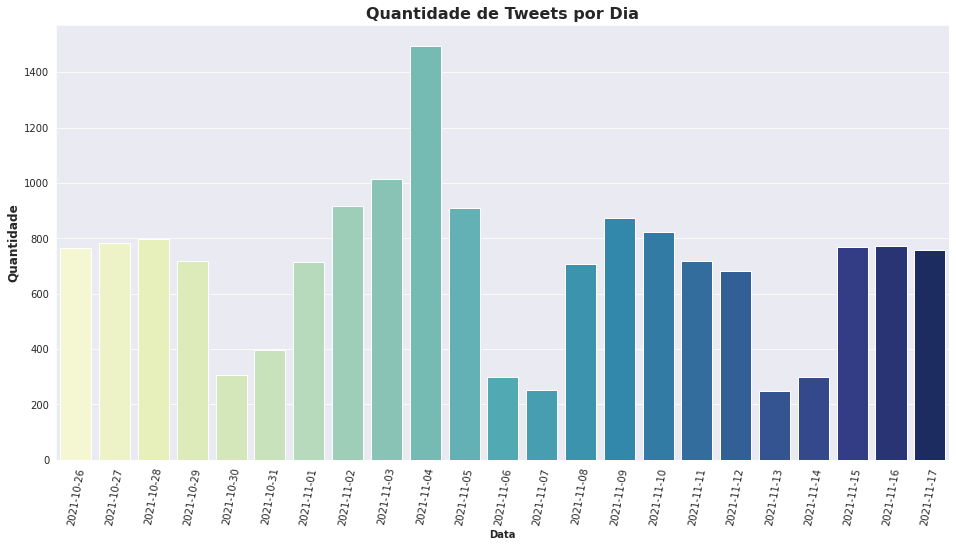

In [23]:
fig, ax = plt.subplots(figsize=(16,8)) 
sns.countplot(x=df_tweets['DataText'], palette='YlGnBu')
plt.title('Quantidade de Tweets por Dia', fontsize=16, fontweight='bold')
ax.set_xlabel('Data', fontsize=10, fontweight='bold')
plt.xticks(rotation=80)
ax.set_ylabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
df_tweets['DataText'].value_counts()

2021-11-04    1496
2021-11-03    1013
2021-11-02     916
2021-11-05     911
2021-11-09     872
2021-11-10     823
2021-10-28     797
2021-10-27     784
2021-11-16     773
2021-11-15     767
2021-10-26     764
2021-11-17     757
2021-11-11     719
2021-10-29     718
2021-11-01     713
2021-11-08     709
2021-11-12     682
2021-10-31     397
2021-10-30     307
2021-11-06     299
2021-11-14     298
2021-11-07     252
2021-11-13     247
Name: DataText, dtype: int64

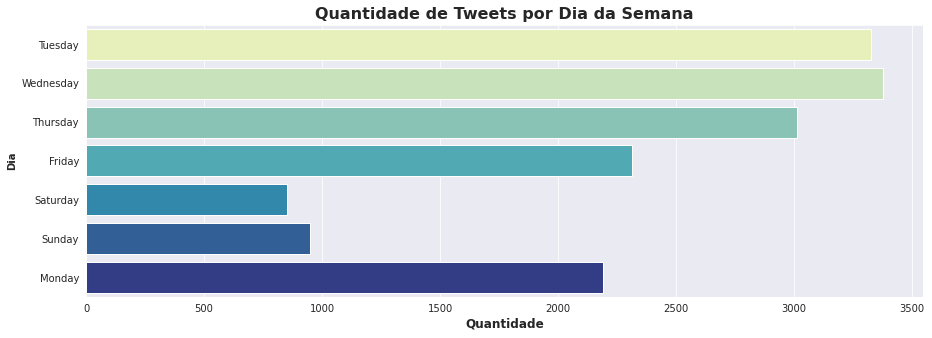

In [261]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.countplot(y=df_tweets['Dia_da_Semana'], palette='YlGnBu')
plt.title('Quantidade de Tweets por Dia da Semana', fontsize=16, fontweight='bold')
ax.set_ylabel('Dia', fontsize=10, fontweight='bold')
ax.set_xlabel('Quantidade', fontsize=12, fontweight='bold')
plt.show()

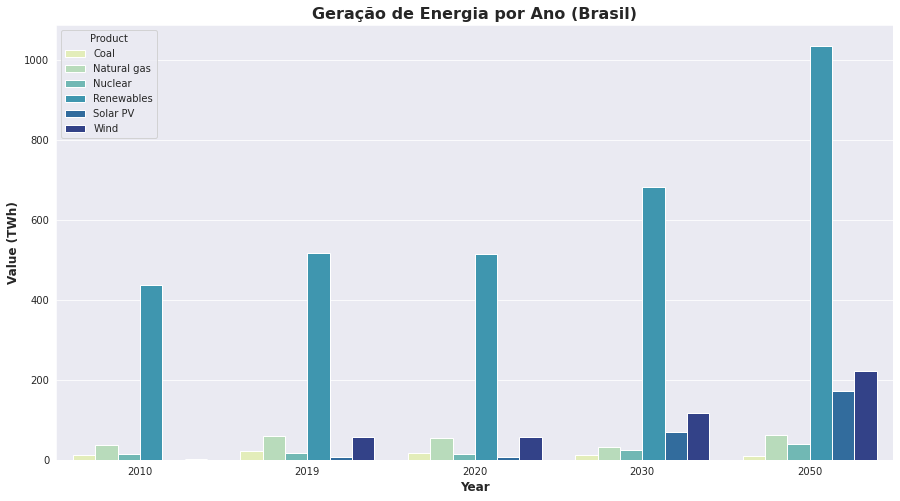

In [24]:
fig, ax = plt.subplots(figsize=(15,8)) 
sns.barplot(x=df_stepsBrGr['Year'], y=df_stepsBrGr['TWh'], hue=df_stepsBrGr['Product'], palette='YlGnBu')
plt.title('Geração de Energia por Ano (Brasil)', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Value (TWh)', fontsize=12, fontweight='bold')
plt.show()

In [ ]:
#Resumo numérico do Relatado no gráfico, os datasets são iguais, a diferença é que o agrupamento garante a soma dos dados de forma coerente e ordenada
df_stepsBr.groupby(['Year', 'Product'])['Value(TWh)'].sum()

Year  Product    
2010  Coal             11.34
      Natural gas      36.48
      Nuclear          14.52
      Renewables      436.93
      Solar PV          0.00
      Wind              2.18
2019  Coal             21.31
      Natural gas      60.45
      Nuclear          16.13
      Renewables      517.80
      Solar PV          6.66
      Wind             55.99
2020  Coal             16.70
      Natural gas      55.01
      Nuclear          13.96
      Renewables      514.96
      Solar PV          8.07
      Wind             57.05
2030  Coal             11.61
      Natural gas      31.43
      Nuclear          24.41
      Renewables      681.18
      Solar PV         70.38
      Wind            117.87
2050  Coal              8.63
      Natural gas      62.19
      Nuclear          39.39
      Renewables     1035.39
      Solar PV        171.94
      Wind            221.15
Name: Value(TWh), dtype: float64

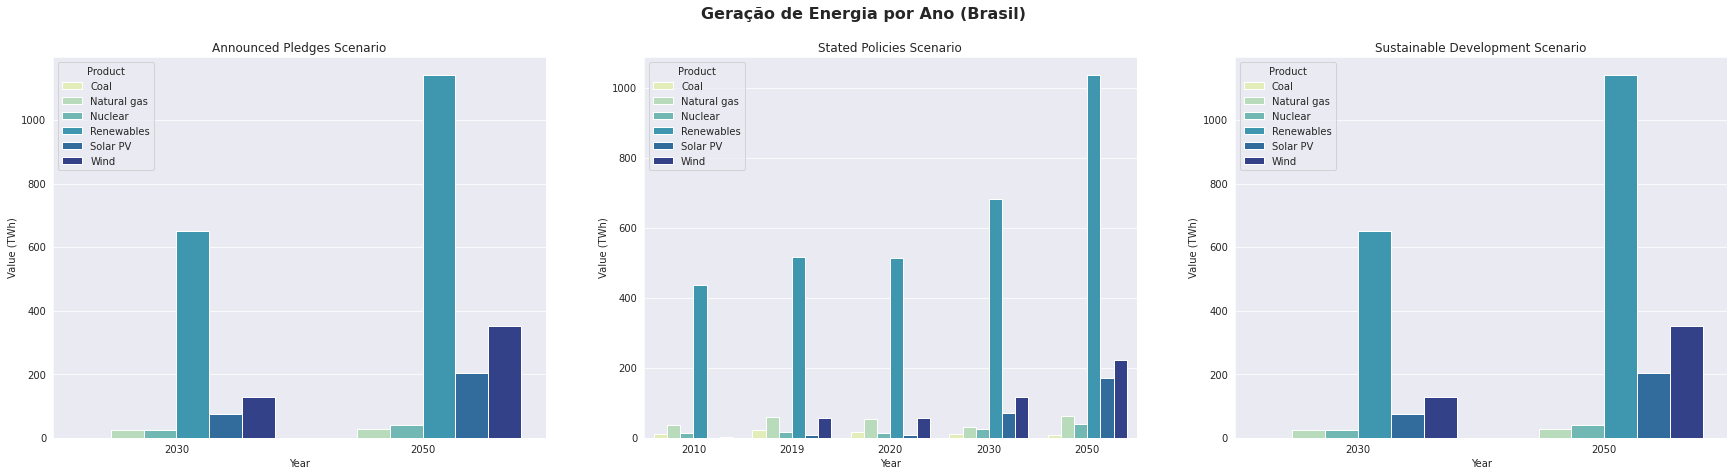

In [265]:
#Graficos Cenários Desenvolvimento Brasil
fig, ax = plt.subplots(1, 3, figsize=(30,7)) 
fig.suptitle('Geração de Energia por Ano (Brasil)', fontsize=16, fontweight='bold')

# aps - Announced Pledges Scenario
sns.barplot(ax=ax[0], x=df_apsBrGr['Year'], y=df_apsBrGr['TWh'], hue=df_apsBrGr['Product'], palette='YlGnBu')
ax[0].set_title('Announced Pledges Scenario')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Value (TWh)')

# steps - Stated Policies Scenario
sns.barplot(ax=ax[1], x=df_stepsBrGr['Year'], y=df_stepsBrGr['TWh'], hue=df_stepsBrGr['Product'], palette='YlGnBu')
ax[1].set_title('Stated Policies Scenario')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Value (TWh)')

# sds - Sustainable Development Scenario
sns.barplot(ax=ax[2], x=df_sdsBrGr['Year'], y=df_sdsBrGr['TWh'], hue=df_sdsBrGr['Product'], palette='YlGnBu')
ax[2].set_title('Sustainable Development Scenario')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Value (TWh)')

plt.show()

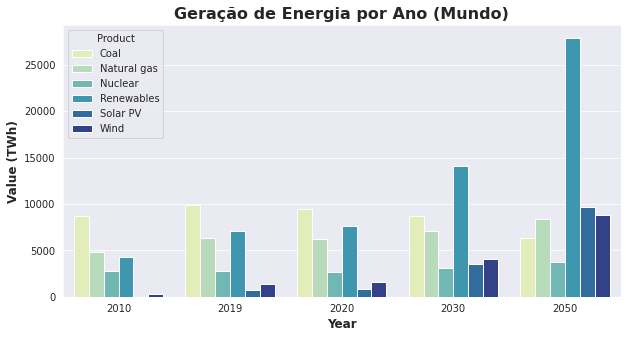

In [ ]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.barplot(x=df_stepsGr['Year'], y=df_stepsGr['TWh'], hue=df_stepsGr['Product'], ci=None, palette='YlGnBu')
plt.title('Geração de Energia por Ano (Mundo)', fontsize=16, fontweight='bold')
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Value (TWh)', fontsize=12, fontweight='bold')
plt.show()

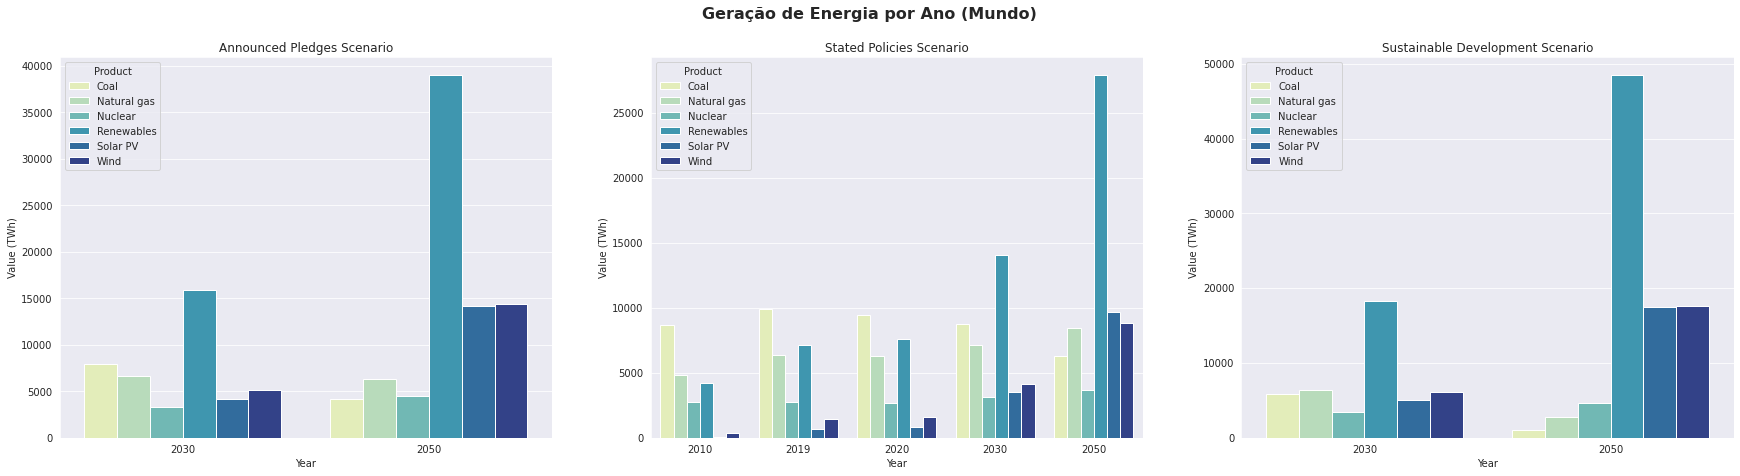

In [ ]:
#Graficos Cenários Desenvolvimento Mundial
fig, ax = plt.subplots(1, 3, figsize=(30,7)) 
fig.suptitle('Geração de Energia por Ano (Mundo)', fontsize=16, fontweight='bold')

# aps - Announced Pledges Scenario
sns.barplot(ax=ax[0], x=df_apsGr['Year'], y=df_apsGr['TWh'], hue=df_apsGr['Product'], palette='YlGnBu')
ax[0].set_title('Announced Pledges Scenario')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Value (TWh)')

# steps - Stated Policies Scenario
sns.barplot(ax=ax[1], x=df_stepsGr['Year'], y=df_stepsGr['TWh'], hue=df_stepsGr['Product'], palette='YlGnBu')
ax[1].set_title('Stated Policies Scenario')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Value (TWh)')

# sds - Sustainable Development Scenario
sns.barplot(ax=ax[2], x=df_sdsGr['Year'], y=df_sdsGr['TWh'], hue=df_sdsGr['Product'], palette='YlGnBu')
ax[2].set_title('Sustainable Development Scenario')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Value (TWh)')

plt.show()